# Курсовая работа
<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). 

## Codebook
<br>


`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

### Импорты

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('telecom_users.csv')
df_1 = df.copy(deep=True)
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [3]:
df.isnull().sum(), df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


(customerID          0
 gender              0
 SeniorCitizen       0
 Partner             0
 Dependents          0
 tenure              0
 PhoneService        0
 MultipleLines       0
 InternetService     0
 OnlineSecurity      0
 OnlineBackup        0
 DeviceProtection    0
 TechSupport         0
 StreamingTV         0
 StreamingMovies     0
 Contract            0
 PaperlessBilling    0
 PaymentMethod       0
 MonthlyCharges      0
 TotalCharges        0
 Churn               0
 dtype: int64,
 (5986, 21),
 None)

Пропущенных значений нет.
Числовые данные в трех столбцах: SeniorCitizen, tenure, MonthlyCharges.
SeniorCitizen - категориальные данные, как и другие данные со строковым типом,
tenure - дискретные данные,
MonthlyCharges, TotalCharges - непрерывные.
Столбец TotalCharges содержит непрерывные данные  в формате string. В нескольких строчках пропущенные значения - пробелы. 

In [4]:
#Ищем индексы строк с пропущенными значениями в столбце TotalCharges, удаляем.
index = []
for i, num in enumerate(df.TotalCharges):
    try:
        float(num)
    except:
        index.append(i)
        print(i)

356
634
2771
3086
3255
4326
5375
5382
5695
5951


In [5]:
df = df.drop(index=index)
df.TotalCharges  = df.TotalCharges.astype(float) #Переводим в тип float.

#### Меры центральной тенденции и меры разброса

In [6]:
stat = df.describe()
stat = stat.reset_index()
stat

,index,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,count,5976.000000,5976.000000,5976.000000,5976.000000
1,mean,0.161647,32.523092,64.846687,2298.060617
2,std,0.368157,24.500858,30.107576,2274.127165
3,min,0.000000,1.000000,18.250000,18.800000
4,25%,0.000000,9.000000,35.750000,404.312500
5,50%,0.000000,29.000000,70.425000,1412.150000
6,75%,0.000000,56.000000,89.900000,3846.962500
7,max,1.000000,72.000000,118.750000,8684.800000


In [7]:
#Считаем размах и межквартильный размах
stat.TotalCharges.loc[7] - stat.TotalCharges.loc[3] # 8666.0
stat.MonthlyCharges.loc[7] - stat.MonthlyCharges.loc[3] #100.5
stat.tenure.loc[7] - stat.tenure.loc[3] #71
stat.TotalCharges.loc[6] - stat.TotalCharges.loc[4] # 3442.65
stat.MonthlyCharges.loc[6] - stat.MonthlyCharges.loc[4] #54.15
stat.tenure.loc[6] - stat.tenure.loc[4] #47

47.0

В столбцах tenure и TotalCharges медиана меньше, чем среднее, - возможно, есть выбросы справа,
в столбце MonthlyCharges - наоборот, выбросы слева. Стоит проверить, построив гистограммы.
SeniorCitizen - категориальный признак.

<AxesSubplot:>

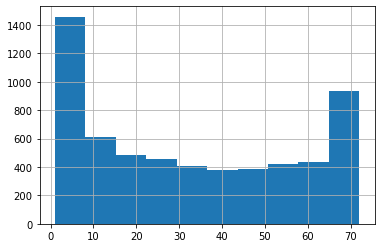

In [8]:
df.tenure.hist()
# Строим гистограмму для значения tenure

Не похоже на выбросы, минимальных и максимальных значений больше, чем остальных. Выделяются группы от нуля до ~8, от ~8 до ~65, от ~65 до ~72.

<AxesSubplot:>

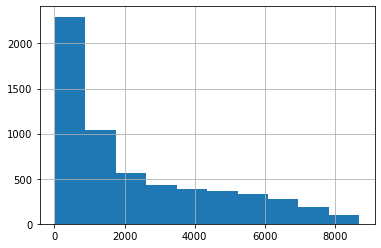

In [9]:
df.TotalCharges.hist()
#Строим гистограмму для признака TotalCharges

Правосторонняя асимметрия показывает, почему медиана была меньше среднего значения.

<AxesSubplot:>

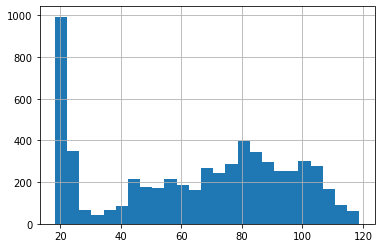

In [10]:
df.MonthlyCharges.hist(bins=25)
#Строим гистограмму для признака MonthlyCharges

In [11]:
df['type'] = df.MonthlyCharges.apply(lambda x: 1 if x > 25 else 0) #Отделим группу с низкой оплатой за месяц
# df.groupby('type').agg({'MonthlyCharges': ['min', 'mean', 'median', 'max'], 'customerID': 'count'})

В этом случае значения слева тоже нельзя назвать выбросами, поскольку количественно их много.

#### Обработка категориальных данных.

##### gender, Partner, Dependents, PhoneService, PaperlessBilling, SenirCitizen

In [12]:
df['gender'].value_counts(),\
df['Partner'].value_counts(),\
df['Dependents'].value_counts(),\
df['PhoneService'].value_counts(),\
df['PaperlessBilling'].value_counts(),\
df.SeniorCitizen.value_counts()
#Сбалансированные признаки: gender, Partner.
#Несбалансированные: Dependents, PhoneService, PaperlessBilling, SeniorCitizen.

(Male      3044
 Female    2932
 Name: gender, dtype: int64,
 No     3080
 Yes    2896
 Name: Partner, dtype: int64,
 No     4195
 Yes    1781
 Name: Dependents, dtype: int64,
 Yes    5388
 No      588
 Name: PhoneService, dtype: int64,
 Yes    3525
 No     2451
 Name: PaperlessBilling, dtype: int64,
 0    5010
 1     966
 Name: SeniorCitizen, dtype: int64)

In [13]:
#Cоберем все социальные характеристики клиента в одну
df['pers_type'] = (df['gender'].map(str) + df['SeniorCitizen'].map(str) + df['Partner'].map(str) + df['Dependents'].map(str))

In [14]:
#Переводим бинарные категориальные данные в числовой формат 1/0.
df['gender'] = df["gender"].apply(lambda x: 0 if x == 'Male' else 1).astype(int)
df['Partner'] = df['Partner'].apply(lambda x: 0 if x == 'No' else 1).astype(int)
df['Dependents'] = df['Dependents'].apply(lambda x: 0 if x == 'No' else 1).astype(int)
df['PhoneService'] = df['PhoneService'].apply(lambda x: 0 if x == 'No' else 1).astype(int)
df['Churn'] = df['Churn'].apply(lambda x: 0 if x == 'No' else 1).astype(int)
df['PaperlessBilling'] = df['PaperlessBilling'].apply(lambda x: 0 if x == 'No' else 1).astype(int)

In [15]:
#Соберем все социальные характеристики в один признак, но с числовым значением
df['pers_type_int'] = (df['gender'].map(str) + df['SeniorCitizen'].map(str) + df['Partner'].map(str) + df['Dependents'].map(str)).astype(int)

##### MultipleLines, InternetService, OnlineSecurity, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaymentMethod, OnlineBackup  

In [16]:
#Смотрим количество значений по различным типам этих значений
df.MultipleLines.value_counts(),\
df.OnlineSecurity.value_counts(),\
df.DeviceProtection.value_counts(),\
df.TechSupport.value_counts(),\
df.StreamingTV.value_counts(),\
df.StreamingMovies.value_counts(),\
df.Contract.value_counts(),\
df.PaymentMethod.value_counts(),\
df.OnlineBackup.value_counts()

(No                  2843
 Yes                 2545
 No phone service     588
 Name: MultipleLines, dtype: int64,
 No                     2982
 Yes                    1709
 No internet service    1285
 Name: OnlineSecurity, dtype: int64,
 No                     2639
 Yes                    2052
 No internet service    1285
 Name: DeviceProtection, dtype: int64,
 No                     2959
 Yes                    1732
 No internet service    1285
 Name: TechSupport, dtype: int64,
 No                     2388
 Yes                    2303
 No internet service    1285
 Name: StreamingTV, dtype: int64,
 No                     2353
 Yes                    2338
 No internet service    1285
 Name: StreamingMovies, dtype: int64,
 Month-to-month    3269
 Two year          1432
 One year          1275
 Name: Contract, dtype: int64,
 Electronic check             2006
 Mailed check                 1362
 Bank transfer (automatic)    1306
 Credit card (automatic)      1302
 Name: PaymentMethod, dtyp

Частично сбалансированные признаки (два признака из трех): MultipleLines, TechSupport, StreamingTV, Contract.
Контрактов на месяц значительно больше, чем на год и на два.
No internet service - значение, общее для пользователей услугами OnlineSecurity, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, OnlineBackup.  

In [17]:
#Выражаем остальные категориальные данные через числа 0/1/2/3.
df['MultipleLines'] = df['MultipleLines'].map( {'No': 0, 'Yes': 1, 'No phone service': 2} ).astype(int)
df['InternetService'] = df['InternetService'].map( {'No': 0, 'Fiber optic': 1, 'DSL': 2} ).astype(int)
df['OnlineSecurity'] = df['OnlineSecurity'].map( {'No': 0, 'Yes': 1, 'No internet service': 2} ).astype(int)
df['DeviceProtection'] = df['DeviceProtection'].map( {'No': 0, 'Yes': 1, 'No internet service': 2} ).astype(int)
df['TechSupport'] = df['TechSupport'].map( {'No': 0, 'Yes': 1, 'No internet service': 2} ).astype(int)
df['StreamingTV'] = df['StreamingTV'].map( {'No': 0, 'Yes': 1, 'No internet service': 2} ).astype(int)
df['StreamingMovies'] = df['StreamingMovies'].map( {'No': 0, 'Yes': 1, 'No internet service': 2} ).astype(int)
df['Contract'] = df['Contract'].map( {'Month-to-month': 0, 'One year': 1, 'Two year': 2} ).astype(int)
df['PaymentMethod'] = df['PaymentMethod'].map( {'Credit card (automatic)': 0, 'Bank transfer (automatic)': 1, 'Electronic check': 2, 'Mailed check': 3} ).astype(int)
df['OnlineBackup'] = df['OnlineBackup'].map( {'No': 0, 'Yes': 1, 'No internet service': 2} ).astype(int)

#### Целевая переменная

In [18]:
df.Churn.value_counts()
#Несбалансированная выборка.

0    4389
1    1587
Name: Churn, dtype: int64

# 2. Исследование зависимостей и формулирование гипотез

#### Таблица корреляции

In [19]:
corr = df.corr()
corr[np.abs(corr) < 0.3] = 0 #Убираем случаи слабой корреляции.
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,type,pers_type_int
gender,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.997252
SeniorCitizen,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Partner,0.000000,0.0,1.000000,0.448684,0.384269,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.322968,0.000000,0.000000,0.000000
Dependents,0.000000,0.0,0.448684,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
tenure,0.000000,0.0,0.384269,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.677012,0.000000,-0.362217,0.000000,0.827439,-0.350420,0.000000,0.000000
PhoneService,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,-0.692476,-0.389718,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MultipleLines,0.000000,0.0,0.000000,0.000000,0.000000,-0.692476,1.000000,0.341998,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.327968,0.000000
InternetService,0.000000,0.0,0.000000,0.000000,0.000000,-0.389718,0.341998,1.000000,-0.609183,-0.656216,...,-0.710903,-0.704698,0.000000,0.000000,0.000000,0.318930,0.000000,0.000000,0.722641,0.000000
OnlineSecurity,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.609183,1.000000,0.750736,...,0.704996,0.707808,0.387774,-0.330445,0.000000,-0.613176,0.000000,-0.329621,-0.765195,0.000000
OnlineBackup,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.656216,0.750736,1.000000,...,0.718796,0.717346,0.349830,0.000000,0.000000,-0.531928,0.000000,0.000000,-0.744374,0.000000


<AxesSubplot:>

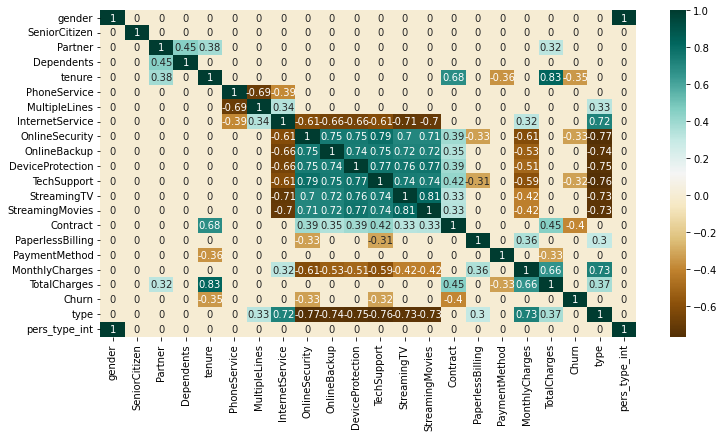

In [20]:
df_hm = df.drop(['customerID'], axis=1)
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap='BrBG')

- Отметим сильную корреляцию TotalCharges и tenure; все-таки значение 0.83 не позволяет выкинуть один из признаков - наоборот, их значимость повышается, поскольку задача - удержать клиентов, уменьшить отток.
- Есть блок признаков, связанных с интернет-сервисом, которые имеют похожие модули значений корреляции. 
- Вполне логична отрицательная корреляция услуг, связанных с интернет-сервисом, и ежемесячной оплаты. Хотя, казалось, что корреляция должна быть больше проявлена.
- Есть также небольшая корреляция типов контракта (Contract) и длительностью (tenure) пользования услугами.
- Сильных зависимостей таргета от какого-нибудь признака нет, чуть более проявлены отрицательные корреляции tenure-Churn, Contract-Churn. 

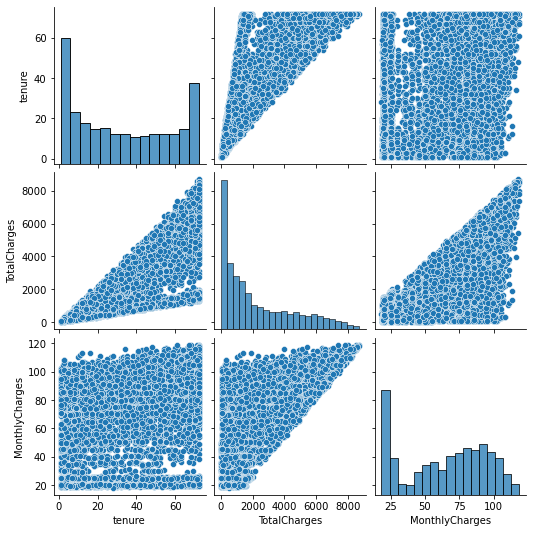

In [21]:
sns.pairplot(df[['tenure', 'TotalCharges', 'MonthlyCharges']])

#### Есть ли связь между размером оплаты за месяц (MonthlyCharges) и длительностью пользования услугами (tenure)?
#### Одинаковое ли количество человек в месяц пользуется услугами телекоммуникационной компании? Как зависит количество клиентов (count(customerID)) от длительности (tenure)?

In [22]:
#Делаем группировку по длительности пользования услугами (tenure),
#считаем медианные значения оплаты в месяц (MonthlyCharges) и в год (TotalCharges),
#сортируем по количеству клиентов.
df.groupby('tenure', as_index=False).agg({'customerID': 'count',\
                                          'MonthlyCharges': 'median',\
                                          'TotalCharges': 'median'})\
.sort_values('customerID', ascending=False).head(10)

,tenure,customerID,MonthlyCharges,TotalCharges
0,1,510,49.900,49.900
71,72,308,89.725,6465.875
1,2,194,55.925,114.400
2,3,169,64.400,191.350
3,4,154,55.400,228.450
70,71,152,83.750,5984.575
4,5,111,69.350,331.900
6,7,111,69.200,472.650
7,8,110,59.625,485.000
9,10,102,61.600,623.225


- Мода по признаку tenure = 1.
- Интересно заметить разницу между количеством тех, кто воспользовался услугами в первый месяц, и тех, кто продолжил пользоваться услугами.
- Максимальные значения количества пользователей в первый месяц, возможно, говорят о том, что входное предложение привлекательное, но эти услуги связи подходят не всем пользователям. Кроме того, раньше эти услуги связи, возможно, были привлекательнее для клиентов.
- Если сделать сортировку по TotalCharges, то можно наблюдать очевидную корреляцию между длительностью использования услуг и общей суммой оплаты.
- Возможно, клиенты, которые с компанией дольше, платят больше. Это стоит проверить.

#### Клиенты, которые с компанией дольше, платят больше.

In [23]:
df.groupby('tenure', as_index=False).agg({'customerID':'count', 'MonthlyCharges': 'median'}).sort_values('tenure').head(5)

,tenure,customerID,MonthlyCharges
0,1,510,49.900
1,2,194,55.925
2,3,169,64.400
3,4,154,55.400
4,5,111,69.350


In [24]:
df.groupby('tenure', as_index=False).agg({'customerID':'count', 'MonthlyCharges': 'median'}).sort_values('tenure').tail(5)


,tenure,customerID,MonthlyCharges
67,68,89,82.850
68,69,77,81.950
69,70,90,85.375
70,71,152,83.750
71,72,308,89.725


Оплата со второго месяца в пределах 50-70, то есть не растет, но заметно, что люди, давно пользующиеся услугами (50-70 месяцев), платят от 70 до 90 условных единиц. Проверим это через диаграмму рассеяния.

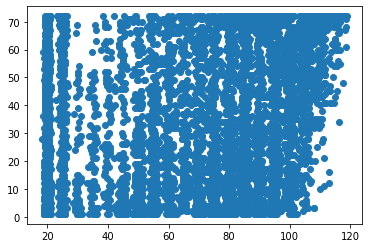

In [489]:
plt.scatter(df['MonthlyCharges'], df['tenure'])

Линейной связи признаков 'MonthlyCharges', 'tenure' нет. 
Отметим, что на низкую оплату (18-25 у.ед.) всегда есть спрос и у "старых" пользователей, и у новых.  
Особо плотные значения от 45 до 110 условных единиц. 

#### Есть ли связь социальных характеристик и готовностью платить определенную сумму за услуги?

In [490]:
df.groupby(['pers_type', 'pers_type_int']).agg({'customerID':'count', 'MonthlyCharges': ['min', 'max', 'median']})

customerID MonthlyCharges                 
                                 count            min     max   median
pers_type     pers_type_int                                           
Female0NoNo   1000                1111          18.70  118.65   64.900
Female0NoYes  1001                 122          19.45  116.15   54.625
Female0YesNo  1010                 513          18.40  118.60   78.850
Female0YesYes 1011                 704          18.80  118.75   59.625
Female1NoNo   1100                 264          19.50  117.35   80.575
Female1NoYes  1101                   3          71.00  105.35  101.300
Female1YesNo  1110                 182          19.60  117.45   90.775
Female1YesYes 1111                  33          29.30  110.60   88.450
Male0NoNo     0                   1191          18.25  118.35   60.650
Male0NoYes    1                    175          19.10  114.60   48.650
Male0YesNo    10                   487          18.80  117.80   80.250
Male0YesYes   11                   707          18.80  116.60   64.750
Male1NoNo     100                  209          19.20  116.50   78.500
Male1NoYes    101                    5          45.75   94.80   54.550
Male1YesNo    110                  238          19.35  116.05   86.600
Male1YesYes   111                   32          19.50  116.25   91.550

Клиенты телекоммуникационной компании в основном свободные бездетные женщины и мужчины не пенсионного возраста. Меньше всего мужчин-пенсионеров не в браке, но с иждивенцами, а также женщин-пенсионерок не в браке, но с иждивенцами.
Больше всего за услуги в месяц в среднем платят женщины-пенсионерки не в браке, но с иждивенцами (всего три человека в выборке), женщины-пенсионерки в браке и с иждивенцами, мужчины-пенсионеры в браке и с иждивенцами.


#### Есть ли связь между наличием партнеров и иждивенцев у клиента с использованием интернет-сервисов

In [491]:
df.groupby(['Partner', 'StreamingTV']).agg('count')

customerID  gender  SeniorCitizen  Dependents  tenure  \
Partner StreamingTV                                                          
0       0                  1421    1421           1421        1421    1421   
        1                   998     998            998         998     998   
        2                   661     661            661         661     661   
1       0                   967     967            967         967     967   
        1                  1305    1305           1305        1305    1305   
        2                   624     624            624         624     624   

                     PhoneService  MultipleLines  InternetService  \
Partner StreamingTV                                                 
0       0                    1421           1421             1421   
        1                     998            998              998   
        2                     661            661              661   
1       0                     967            967              967   
        1                    1305           1305             1305   
        2                     624            624              624   

                     OnlineSecurity  OnlineBackup  ...  StreamingMovies  \
Partner StreamingTV                                ...                    
0       0                      1421          1421  ...             1421   
        1                       998           998  ...              998   
        2                       661           661  ...              661   
1       0                       967           967  ...              967   
        1                      1305          1305  ...             1305   
        2                       624           624  ...              624   

                     Contract  PaperlessBilling  PaymentMethod  \
Partner StreamingTV                                              
0       0                1421              1421           1421   
        1                 998               998            998   
        2                 661               661            661   
1       0                 967               967            967   
        1                1305              1305           1305   
        2                 624               624            624   

                     MonthlyCharges  TotalCharges  Churn  type  pers_type  \
Partner StreamingTV                                                         
0       0                      1421          1421   1421  1421       1421   
        1                       998           998    998   998        998   
        2                       661           661    661   661        661   
1       0                       967           967    967   967        967   
        1                      1305          1305   1305  1305       1305   
        2                       624           624    624   624        624   

                     pers_type_int  
Partner StreamingTV                 
0       0                     1421  
        1                      998  
        2                      661  
1       0                      967  
        1                     1305  
        2                      624  

[6 rows x 22 columns]

In [492]:
df.groupby(['Dependents', 'StreamingTV']).agg('count')

customerID  gender  SeniorCitizen  Partner  tenure  \
Dependents StreamingTV                                                       
0          0                  1811    1811           1811     1811    1811   
           1                  1641    1641           1641     1641    1641   
           2                   743     743            743      743     743   
1          0                   577     577            577      577     577   
           1                   662     662            662      662     662   
           2                   542     542            542      542     542   

                        PhoneService  MultipleLines  InternetService  \
Dependents StreamingTV                                                 
0          0                    1811           1811             1811   
           1                    1641           1641             1641   
           2                     743            743              743   
1          0                     577            577              577   
           1                     662            662              662   
           2                     542            542              542   

                        OnlineSecurity  OnlineBackup  ...  StreamingMovies  \
Dependents StreamingTV                                ...                    
0          0                      1811          1811  ...             1811   
           1                      1641          1641  ...             1641   
           2                       743           743  ...              743   
1          0                       577           577  ...              577   
           1                       662           662  ...              662   
           2                       542           542  ...              542   

                        Contract  PaperlessBilling  PaymentMethod  \
Dependents StreamingTV                                              
0          0                1811              1811           1811   
           1                1641              1641           1641   
           2                 743               743            743   
1          0                 577               577            577   
           1                 662               662            662   
           2                 542               542            542   

                        MonthlyCharges  TotalCharges  Churn  type  pers_type  \
Dependents StreamingTV                                                         
0          0                      1811          1811   1811  1811       1811   
           1                      1641          1641   1641  1641       1641   
           2                       743           743    743   743        743   
1          0                       577           577    577   577        577   
           1                       662           662    662   662        662   
           2                       542           542    542   542        542   

                        pers_type_int  
Dependents StreamingTV                 
0          0                     1811  
           1                     1641  
           2                      743  
1          0                      577  
           1                      662  
           2                      542  

[6 rows x 22 columns]

In [493]:
df.groupby(['Partner', 'StreamingMovies']).agg('count')

customerID  gender  SeniorCitizen  Dependents  \
Partner StreamingMovies                                                  
0       0                      1391    1391           1391        1391   
        1                      1028    1028           1028        1028   
        2                       661     661            661         661   
1       0                       962     962            962         962   
        1                      1310    1310           1310        1310   
        2                       624     624            624         624   

                         tenure  PhoneService  MultipleLines  InternetService  \
Partner StreamingMovies                                                         
0       0                  1391          1391           1391             1391   
        1                  1028          1028           1028             1028   
        2                   661           661            661              661   
1       0                   962           962            962              962   
        1                  1310          1310           1310             1310   
        2                   624           624            624              624   

                         OnlineSecurity  OnlineBackup  ...  StreamingTV  \
Partner StreamingMovies                                ...                
0       0                          1391          1391  ...         1391   
        1                          1028          1028  ...         1028   
        2                           661           661  ...          661   
1       0                           962           962  ...          962   
        1                          1310          1310  ...         1310   
        2                           624           624  ...          624   

                         Contract  PaperlessBilling  PaymentMethod  \
Partner StreamingMovies                                              
0       0                    1391              1391           1391   
        1                    1028              1028           1028   
        2                     661               661            661   
1       0                     962               962            962   
        1                    1310              1310           1310   
        2                     624               624            624   

                         MonthlyCharges  TotalCharges  Churn  type  pers_type  \
Partner StreamingMovies                                                         
0       0                          1391          1391   1391  1391       1391   
        1                          1028          1028   1028  1028       1028   
        2                           661           661    661   661        661   
1       0                           962           962    962   962        962   
        1                          1310          1310   1310  1310       1310   
        2                           624           624    624   624        624   

                         pers_type_int  
Partner StreamingMovies                 
0       0                         1391  
        1                         1028  
        2                          661  
1       0                          962  
        1                         1310  
        2                          624  

[6 rows x 22 columns]

In [494]:
df.groupby(['Dependents', 'StreamingMovies']).agg('count')

customerID  gender  SeniorCitizen  Partner  \
Dependents StreamingMovies                                               
0          0                      1761    1761           1761     1761   
           1                      1691    1691           1691     1691   
           2                       743     743            743      743   
1          0                       592     592            592      592   
           1                       647     647            647      647   
           2                       542     542            542      542   

                            tenure  PhoneService  MultipleLines  \
Dependents StreamingMovies                                        
0          0                  1761          1761           1761   
           1                  1691          1691           1691   
           2                   743           743            743   
1          0                   592           592            592   
           1                   647           647            647   
           2                   542           542            542   

                            InternetService  OnlineSecurity  OnlineBackup  \
Dependents StreamingMovies                                                  
0          0                           1761            1761          1761   
           1                           1691            1691          1691   
           2                            743             743           743   
1          0                            592             592           592   
           1                            647             647           647   
           2                            542             542           542   

                            ...  StreamingTV  Contract  PaperlessBilling  \
Dependents StreamingMovies  ...                                            
0          0                ...         1761      1761              1761   
           1                ...         1691      1691              1691   
           2                ...          743       743               743   
1          0                ...          592       592               592   
           1                ...          647       647               647   
           2                ...          542       542               542   

                            PaymentMethod  MonthlyCharges  TotalCharges  \
Dependents StreamingMovies                                                
0          0                         1761            1761          1761   
           1                         1691            1691          1691   
           2                          743             743           743   
1          0                          592             592           592   
           1                          647             647           647   
           2                          542             542           542   

                            Churn  type  pers_type  pers_type_int  
Dependents StreamingMovies                                         
0          0                 1761  1761       1761           1761  
           1                 1691  1691       1691           1691  
           2                  743   743        743            743  
1          0                  592   592        592            592  
           1                  647   647        647            647  
           2                  542   542        542            542  

[6 rows x 22 columns]

Люди в браке и с иждивенцами чаще подключают стриминговое ТВ и стриминговые фильмы.

In [495]:
df[(df['tenure'] > 20) & (df['StreamingTV'] == 1)\
   & (df['StreamingMovies'] == 1) & (df['InternetService'] == 1)] #874, то есть 25%
df[df['tenure'] > 20] #3553
df[(df['tenure'] > 50) & (df['StreamingTV'] == 1)\
   & (df['StreamingMovies'] == 1) & (df['InternetService'] == 1)] #520, то есть 29%
df[df['tenure'] > 50] #1792
df[(df['tenure'] > 60) & (df['StreamingTV'] == 1)\
   & (df['StreamingMovies'] == 1) & (df['InternetService'] == 1)] #368, то есть 31%
df[df['tenure'] > 60] #1195

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,type,pers_type,pers_type_int
0,7010-BRBUU,0,0,1,1,72,1,1,0,2,...,2,2,0,0,24.10,1734.65,0,0,Male0YesYes,11
5,4312-GVYNH,1,0,1,0,70,0,2,2,1,...,1,2,1,1,49.85,3370.20,0,1,Female0YesNo,1010
17,5115-SQAAU,1,0,1,1,69,1,1,0,2,...,2,2,1,1,25.60,1673.40,0,1,Female0YesYes,1011
21,4683-WYDOU,0,0,1,0,62,1,1,1,0,...,1,2,1,1,107.60,6912.70,0,1,Male0YesNo,10
22,1166-PQLGG,1,0,1,1,72,1,0,0,2,...,2,2,0,1,19.55,1463.45,0,0,Female0YesYes,1011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5947,2834-JRTUA,0,0,0,0,71,1,1,1,1,...,1,2,1,2,108.05,7532.15,1,1,Male0NoNo,0
5954,0902-XKXPN,0,0,1,1,69,1,0,0,2,...,2,2,0,1,20.20,1376.50,0,0,Male0YesYes,11
5956,6211-WWLTF,0,0,1,0,63,1,0,1,1,...,1,2,0,0,99.70,6330.40,0,1,Male0YesNo,10
5977,9076-AXYIK,0,1,1,0,64,1,1,1,0,...,1,2,0,2,102.10,6538.45,0,1,Male1YesNo,110


##### Как связаны признаки Comtract и tenure?

In [497]:
df.groupby('Contract').agg({'tenure': ['median', 'mean', 'max', 'min']}) #Часто более длительные контракты заключают более давние клиенты.
a = df.groupby(['tenure', 'Contract'], as_index=False).agg('count').sort_values('tenure', ascending=False)

Text(0, 0.5, 'Количество человек')

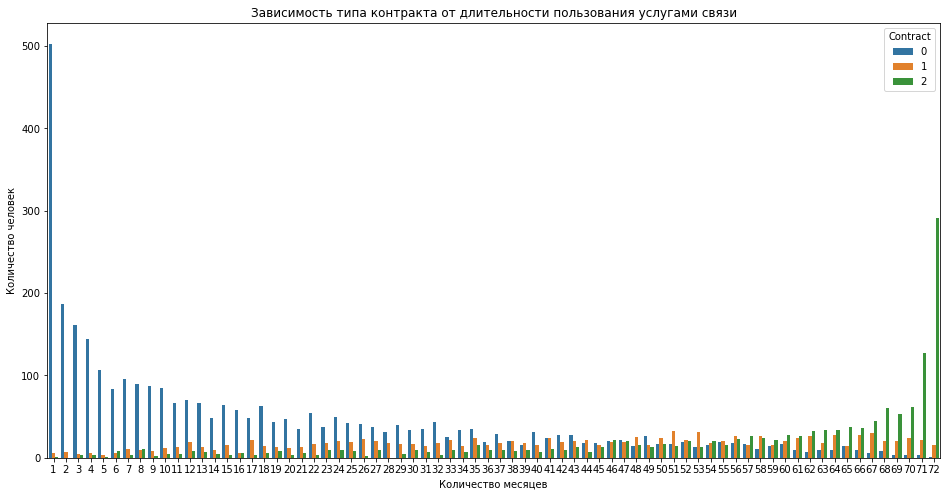

In [498]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.barplot(data=a, x='tenure', y='customerID', hue='Contract')
ax.set_title('Зависимость типа контракта от длительности пользования услугами связи')
ax.set_xlabel('Количество месяцев')
ax.set_ylabel('Количество человек')
#Примечание
#Типы контрактов: 0 - один месяц, 1 - один год, 2 - два года.

Вывод: с 1-го по 49 месяц превалируют месячные контракты, более "старые" клиенты отдают предпочтение двухгодичным и годовым контрактам.

#### Связь целевой переменной с социальными характеристика клиентов

In [499]:
df_churn = df.groupby(['pers_type', 'pers_type_int', 'Churn']).\
agg('count')['customerID'].reset_index() #Делаем группировку по типам клиентов и целевой переменной, считаем количество клиентов.

In [500]:
df_churn.head()

,pers_type,pers_type_int,Churn,customerID
0,Female0NoNo,1000,0,758
1,Female0NoNo,1000,1,353
2,Female0NoYes,1001,0,94
3,Female0NoYes,1001,1,28
4,Female0YesNo,1010,0,414


In [501]:
df_new_new = df_churn[['pers_type', 'customerID']].groupby('pers_type', as_index=False).agg('sum') #Считаем общее количество клиентов
df_new_new.rename(columns={'customerID': 'summa'}, inplace=True)
df_churn = df_churn.merge(df_new_new) #Добавляем столбец с общим количеством клиентов по типам.

In [502]:
df_churn['share'] = round((df_churn['customerID'] / df_churn['summa'])*100) #Считаем процент оттока среди клиентов одного типа
df_churn[df_churn['Churn'] == 1].sort_values('share', ascending=False) #Выбираем только те случаи, когда клиенты перестали пользоваться услугами компании, сортируем процент оттока по убыванию

,pers_type,pers_type_int,Churn,customerID,summa,share
9,Female1NoNo,1100,1,133,264,50.0
25,Male1NoNo,100,1,99,209,47.0
29,Male1YesNo,110,1,87,238,37.0
13,Female1YesNo,1110,1,65,182,36.0
11,Female1NoYes,1101,1,1,3,33.0
1,Female0NoNo,1000,1,353,1111,32.0
17,Male0NoNo,0,1,360,1191,30.0
31,Male1YesYes,111,1,9,32,28.0
3,Female0NoYes,1001,1,28,122,23.0
21,Male0YesNo,10,1,110,487,23.0


Большой процент оттока среди клиентов обоего пола, находящихся на пенсии, не состоящих в браке и без иждивенцев. В количественном отношении также нельзя не отметить значительный отток мужчин и женщин из самой большой группы, то есть тех, кто не состоит в браке и не имеет детей.

#### Есть ли связь между оттоком клиентов и использованием услуг телефонной связи и интернет-сервисов? Возможно, клиентам не нравится качество предоставляемых услуг?

In [503]:
df.groupby(['PhoneService', 'Churn']).agg('count')

customerID  gender  SeniorCitizen  Partner  Dependents  \
PhoneService Churn                                                           
0            0             439     439            439      439         439   
             1             149     149            149      149         149   
1            0            3950    3950           3950     3950        3950   
             1            1438    1438           1438     1438        1438   

                    tenure  MultipleLines  InternetService  OnlineSecurity  \
PhoneService Churn                                                           
0            0         439            439              439             439   
             1         149            149              149             149   
1            0        3950           3950             3950            3950   
             1        1438           1438             1438            1438   

                    OnlineBackup  ...  StreamingTV  StreamingMovies  Contract  \
PhoneService Churn                ...                                           
0            0               439  ...          439              439       439   
             1               149  ...          149              149       149   
1            0              3950  ...         3950             3950      3950   
             1              1438  ...         1438             1438      1438   

                    PaperlessBilling  PaymentMethod  MonthlyCharges  \
PhoneService Churn                                                    
0            0                   439            439             439   
             1                   149            149             149   
1            0                  3950           3950            3950   
             1                  1438           1438            1438   

                    TotalCharges  type  pers_type  pers_type_int  
PhoneService Churn                                                
0            0               439   439        439            439  
             1               149   149        149            149  
1            0              3950  3950       3950           3950  
             1              1438  1438       1438           1438  

[4 rows x 22 columns]

Отток у людей, не подключенных к телефонной связи, - 25%, у подключенных - 27%. Различия незначительны.


In [504]:
df.groupby(['StreamingTV', 'Churn']).agg('count') 

customerID  gender  SeniorCitizen  Partner  Dependents  \
StreamingTV Churn                                                           
0           0            1589    1589           1589     1589        1589   
            1             799     799            799      799         799   
1           0            1614    1614           1614     1614        1614   
            1             689     689            689      689         689   
2           0            1186    1186           1186     1186        1186   
            1              99      99             99       99          99   

                   tenure  PhoneService  MultipleLines  InternetService  \
StreamingTV Churn                                                         
0           0        1589          1589           1589             1589   
            1         799           799            799              799   
1           0        1614          1614           1614             1614   
            1         689           689            689              689   
2           0        1186          1186           1186             1186   
            1          99            99             99               99   

                   OnlineSecurity  ...  TechSupport  StreamingMovies  \
StreamingTV Churn                  ...                                 
0           0                1589  ...         1589             1589   
            1                 799  ...          799              799   
1           0                1614  ...         1614             1614   
            1                 689  ...          689              689   
2           0                1186  ...         1186             1186   
            1                  99  ...           99               99   

                   Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  \
StreamingTV Churn                                                              
0           0          1589              1589           1589            1589   
            1           799               799            799             799   
1           0          1614              1614           1614            1614   
            1           689               689            689             689   
2           0          1186              1186           1186            1186   
            1            99                99             99              99   

                   TotalCharges  type  pers_type  pers_type_int  
StreamingTV Churn                                                
0           0              1589  1589       1589           1589  
            1               799   799        799            799  
1           0              1614  1614       1614           1614  
            1               689   689        689            689  
2           0              1186  1186       1186           1186  
            1                99    99         99             99  

[6 rows x 22 columns]

In [505]:
df.groupby(['StreamingMovies', 'Churn']).agg('count')

customerID  gender  SeniorCitizen  Partner  Dependents  \
StreamingMovies Churn                                                           
0               0            1561    1561           1561     1561        1561   
                1             792     792            792      792         792   
1               0            1642    1642           1642     1642        1642   
                1             696     696            696      696         696   
2               0            1186    1186           1186     1186        1186   
                1              99      99             99       99          99   

                       tenure  PhoneService  MultipleLines  InternetService  \
StreamingMovies Churn                                                         
0               0        1561          1561           1561             1561   
                1         792           792            792              792   
1               0        1642          1642           1642             1642   
                1         696           696            696              696   
2               0        1186          1186           1186             1186   
                1          99            99             99               99   

                       OnlineSecurity  ...  TechSupport  StreamingTV  \
StreamingMovies Churn                  ...                             
0               0                1561  ...         1561         1561   
                1                 792  ...          792          792   
1               0                1642  ...         1642         1642   
                1                 696  ...          696          696   
2               0                1186  ...         1186         1186   
                1                  99  ...           99           99   

                       Contract  PaperlessBilling  PaymentMethod  \
StreamingMovies Churn                                              
0               0          1561              1561           1561   
                1           792               792            792   
1               0          1642              1642           1642   
                1           696               696            696   
2               0          1186              1186           1186   
                1            99                99             99   

                       MonthlyCharges  TotalCharges  type  pers_type  \
StreamingMovies Churn                                                  
0               0                1561          1561  1561       1561   
                1                 792           792   792        792   
1               0                1642          1642  1642       1642   
                1                 696           696   696        696   
2               0                1186          1186  1186       1186   
                1                  99            99    99         99   

                       pers_type_int  
StreamingMovies Churn                 
0               0               1561  
                1                792  
1               0               1642  
                1                696  
2               0               1186  
                1                 99  

[6 rows x 22 columns]

24% - отток среди тех, кто не пользовался стриминговым ТВ, 30% - у тех, кто пользовался. Похожие соотношения и со стриминговыми фильмами: 23% и 30% соответственно. Различия тоже кажутся несущественными.


# 3. Построение моделей для прогнозирования оттока

In [532]:
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score

In [508]:
### YOUR CODE HERE ###
target = df['Churn']
df = df.drop(['customerID'], axis=1) #Удаляем уникальный номер клиента, поскольку от его значений результат не может зависеть.
df = df.drop(['pers_type'], axis=1)
df = df.drop(['TotalCharges'], axis=1) #Про удаление этого признака догадалась после проб обучения моделей, roc-auc сначала был 0.65, потом 0.69.
# df = df.drop(['StreamingMovies'], axis=1) #Сначала заодно удалила и этот признак, но лучше стало несильно и только в модели random forest.
#Потом решила этот признак вернуть, обучила модели и чуть не сошла с ума. 

In [509]:
x_train, x_test, y_train, y_test = train_test_split(df, target, random_state=17) #Делим на трэйн и тест.

In [510]:
dtc = DecisionTreeClassifier() #Создаем класс для дерева решений.
dtc_model = dtc.fit(x_train, y_train) #Обучаем
dtc_predictions = dtc.predict(x_test)

In [511]:
tree_params = {'max_depth': range(1, 6), 
               'max_features': range(1, 10)}

tree_grid = GridSearchCV(dtc, tree_params, cv= 5) #Ищем параметры через гридсерч

In [513]:
tree_grid.fit(x_train, y_train) #Обучаем дерево с идеальными параметрами
tree_grid_predicted = tree_grid.predict(x_test)

{'max_depth': 4, 'max_features': 7}

In [516]:
rfc_params = {'n_estimators': range(10, 100, 10), #Задаем параметры для Случайного леса.
              'min_samples_leaf': range(1, 5)}


lr_params = {'C': np.arange(0.5, 1, 0.1)} #Задаем параметры для логистической регрессии

skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True) #Экземпляр для кросс-валидации

In [526]:
rfc =RandomForestClassifier(random_state=17)
lr = LogisticRegression(random_state=17)
rfc_grid = GridSearchCV(rfc, rfc_params, cv= skf, n_jobs=-1) #Делаем гридсерч по признакам
lr_grid = GridSearchCV(lr, lr_params, cv= skf)

In [534]:
rfc_grid.fit(x_train, y_train) #Гридсерч и обучение моделей
lr_grid.fit(x_train, y_train)
rfc_predicted = rfc_grid.predict(x_test) #Предсказания
lr_predicted = lr_grid.predict(x_test)

# 4. Сравнение качества моделей 

##### Дерево решений

In [530]:
roc_auc_score(y_test, dtc_predictions),\ #roc-auc и встроенная метрика для дерева без параметров
dtc.score(x_test, y_test),\
roc_auc_score(y_test, tree_grid_predicted)#roc-auc и встроенная метрика для дерева с подобранными параметрами

(1.0, 1.0, 1.0)

In [533]:
#Precision, recall, f-score для дерева без параметров и с подобранными параметрами
precision_recall_fscore_support(y_test, dtc_predictions, average='binary'),\ 
precision_recall_fscore_support(y_test, tree_grid_predicted, average='binary')

((1.0, 1.0, 1.0, None), (1.0, 1.0, 1.0, None))

##### Случайный лес

In [536]:
#Roc-auc, precision, recall, f-score для случайного леса
roc_auc_score(y_test, rfc_predicted), precision_recall_fscore_support(y_test, rfc_predicted, average='binary')

(1.0, (1.0, 1.0, 1.0, None))


##### Логистическая регрессия

In [537]:
#Roc-auc, precision, recall, f-score для логистической регрессии
roc_auc_score(y_test, lr_predicted), precision_recall_fscore_support(y_test, lr_predicted, average='binary')

(1.0, (1.0, 1.0, 1.0, None))